In [44]:
# Dependencies
import numpy as np
import pandas as pd

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

import datetime as dt

In [45]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [49]:
# Create our session (link) from Python to the DB
session = Session(engine)

first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x23e2bf22e08>,
 'station': 'USC00519397',
 'date': '2010-01-01',
 'tobs': 65.0,
 'id': 1,
 'prcp': 0.08}

## D1: Determine the Summary Statistics for June

In [50]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
june_results=[]
# results = session.query(Measurement.date, Measurement.tobs).filter(Measurement.date == '2017, 6, *').all()
june_results = session.query(Measurement).filter(extract('month',Measurement.date)==6)
print(june_results.all())

[<sqlalchemy.ext.automap.measurement object at 0x0000023E2BFA86C8>, <sqlalchemy.ext.automap.measurement object at 0x0000023E2BFA8808>, <sqlalchemy.ext.automap.measurement object at 0x0000023E2BFA8888>, <sqlalchemy.ext.automap.measurement object at 0x0000023E2BFA8908>, <sqlalchemy.ext.automap.measurement object at 0x0000023E2BFA8988>, <sqlalchemy.ext.automap.measurement object at 0x0000023E2BFA8A48>, <sqlalchemy.ext.automap.measurement object at 0x0000023E2BFA8AC8>, <sqlalchemy.ext.automap.measurement object at 0x0000023E2BFA8B48>, <sqlalchemy.ext.automap.measurement object at 0x0000023E2BFA8BC8>, <sqlalchemy.ext.automap.measurement object at 0x0000023E2BFA8A08>, <sqlalchemy.ext.automap.measurement object at 0x0000023E2BFA8C88>, <sqlalchemy.ext.automap.measurement object at 0x0000023E2BFA8D08>, <sqlalchemy.ext.automap.measurement object at 0x0000023E2BFA8D88>, <sqlalchemy.ext.automap.measurement object at 0x0000023E2BFA8E08>, <sqlalchemy.ext.automap.measurement object at 0x0000023E2BFA8

In [51]:
#  3. Convert the June temperatures to a list.
june_temps_list=[temp.tobs for temp in june_results]
print(june_temps_list)

[78.0, 76.0, 78.0, 76.0, 77.0, 78.0, 77.0, 78.0, 78.0, 79.0, 78.0, 78.0, 78.0, 77.0, 78.0, 78.0, 77.0, 77.0, 82.0, 78.0, 78.0, 78.0, 78.0, 78.0, 77.0, 76.0, 78.0, 78.0, 78.0, 78.0, 77.0, 78.0, 73.0, 70.0, 76.0, 77.0, 77.0, 77.0, 77.0, 78.0, 77.0, 77.0, 78.0, 78.0, 77.0, 78.0, 78.0, 75.0, 76.0, 76.0, 77.0, 78.0, 76.0, 77.0, 75.0, 77.0, 76.0, 76.0, 75.0, 77.0, 77.0, 76.0, 78.0, 77.0, 76.0, 77.0, 76.0, 76.0, 77.0, 77.0, 78.0, 77.0, 77.0, 77.0, 76.0, 75.0, 76.0, 76.0, 77.0, 76.0, 73.0, 73.0, 75.0, 77.0, 76.0, 77.0, 79.0, 78.0, 79.0, 78.0, 78.0, 79.0, 77.0, 77.0, 77.0, 77.0, 77.0, 78.0, 77.0, 76.0, 78.0, 78.0, 77.0, 78.0, 78.0, 73.0, 76.0, 77.0, 75.0, 76.0, 74.0, 75.0, 77.0, 76.0, 77.0, 78.0, 79.0, 77.0, 78.0, 79.0, 78.0, 78.0, 78.0, 78.0, 79.0, 79.0, 82.0, 80.0, 79.0, 79.0, 78.0, 78.0, 77.0, 78.0, 78.0, 73.0, 75.0, 75.0, 76.0, 84.0, 79.0, 76.0, 79.0, 79.0, 77.0, 79.0, 78.0, 78.0, 79.0, 77.0, 79.0, 78.0, 78.0, 78.0, 79.0, 77.0, 78.0, 78.0, 78.0, 78.0, 79.0, 79.0, 77.0, 78.0, 78.0, 78.0, 79.

In [52]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_temps_df = pd.DataFrame(june_temps_list, columns=['June Temps'])
# Sort the dataframe by date
# df = df.sort_index()
june_temps_df.head()

,June Temps
0,78.0
1,76.0
2,78.0
3,76.0
4,77.0


In [53]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_temps_df.describe()

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [58]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
december_results = session.query(Measurement).filter(extract('month',Measurement.date)==12)
print(december_results.all())

[<sqlalchemy.ext.automap.measurement object at 0x0000023E2C155548>, <sqlalchemy.ext.automap.measurement object at 0x0000023E2C155708>, <sqlalchemy.ext.automap.measurement object at 0x0000023E2C155788>, <sqlalchemy.ext.automap.measurement object at 0x0000023E2C155848>, <sqlalchemy.ext.automap.measurement object at 0x0000023E2C155908>, <sqlalchemy.ext.automap.measurement object at 0x0000023E2C155A08>, <sqlalchemy.ext.automap.measurement object at 0x0000023E2C155A88>, <sqlalchemy.ext.automap.measurement object at 0x0000023E2C155B48>, <sqlalchemy.ext.automap.measurement object at 0x0000023E2C155C08>, <sqlalchemy.ext.automap.measurement object at 0x0000023E2C155988>, <sqlalchemy.ext.automap.measurement object at 0x0000023E2C155D08>, <sqlalchemy.ext.automap.measurement object at 0x0000023E2C155D88>, <sqlalchemy.ext.automap.measurement object at 0x0000023E2C155E48>, <sqlalchemy.ext.automap.measurement object at 0x0000023E2C155F08>, <sqlalchemy.ext.automap.measurement object at 0x0000023E2C155

In [59]:
# 7. Convert the December temperatures to a list.
december_temps_list=[temp.tobs for temp in december_results]
print(december_temps_list)

[76.0, 74.0, 74.0, 64.0, 64.0, 67.0, 77.0, 66.0, 69.0, 68.0, 68.0, 71.0, 74.0, 67.0, 66.0, 69.0, 71.0, 70.0, 70.0, 74.0, 74.0, 71.0, 75.0, 75.0, 72.0, 69.0, 68.0, 73.0, 74.0, 73.0, 73.0, 73.0, 73.0, 71.0, 73.0, 73.0, 77.0, 72.0, 71.0, 73.0, 70.0, 73.0, 69.0, 74.0, 72.0, 71.0, 72.0, 72.0, 70.0, 73.0, 73.0, 72.0, 73.0, 73.0, 72.0, 63.0, 65.0, 71.0, 76.0, 70.0, 76.0, 69.0, 69.0, 69.0, 74.0, 76.0, 74.0, 73.0, 73.0, 74.0, 73.0, 73.0, 73.0, 74.0, 74.0, 71.0, 73.0, 72.0, 64.0, 66.0, 73.0, 72.0, 65.0, 64.0, 69.0, 68.0, 77.0, 71.0, 71.0, 69.0, 68.0, 68.0, 69.0, 70.0, 72.0, 76.0, 75.0, 69.0, 71.0, 71.0, 71.0, 68.0, 65.0, 70.0, 69.0, 69.0, 71.0, 67.0, 73.0, 74.0, 73.0, 67.0, 74.0, 75.0, 75.0, 74.0, 67.0, 73.0, 73.0, 71.0, 72.0, 71.0, 68.0, 65.0, 69.0, 70.0, 70.0, 74.0, 71.0, 74.0, 73.0, 72.0, 74.0, 72.0, 74.0, 75.0, 74.0, 70.0, 74.0, 70.0, 66.0, 61.0, 63.0, 63.0, 63.0, 63.0, 67.0, 56.0, 75.0, 77.0, 75.0, 75.0, 75.0, 75.0, 71.0, 70.0, 74.0, 74.0, 75.0, 72.0, 70.0, 66.0, 74.0, 75.0, 74.0, 75.0, 76.

In [60]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
december_temps_df = pd.DataFrame(december_temps_list, columns=['Dec Temps'])
december_temps_df.head()

,Dec Temps
0,76.0
1,74.0
2,74.0
3,64.0
4,64.0


In [61]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
december_temps_df.describe()

,Dec Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


In [62]:
# Additional query 1: Get precipitation for June
june_prec_results = session.query(Measurement.date,Measurement.prcp).filter(extract('month',Measurement.date)==6)
print(june_prec_results.all())

[('2010-06-01', 0.0), ('2010-06-02', 0.01), ('2010-06-03', 0.0), ('2010-06-04', 0.0), ('2010-06-05', 0.0), ('2010-06-06', 0.0), ('2010-06-07', 0.0), ('2010-06-08', 0.0), ('2010-06-09', 0.0), ('2010-06-10', 0.0), ('2010-06-11', 0.0), ('2010-06-12', 0.0), ('2010-06-13', 0.0), ('2010-06-14', 0.0), ('2010-06-15', 0.0), ('2010-06-16', 0.0), ('2010-06-17', 0.0), ('2010-06-18', 0.0), ('2010-06-19', 0.0), ('2010-06-20', 0.0), ('2010-06-21', 0.0), ('2010-06-22', 0.0), ('2010-06-23', 0.0), ('2010-06-24', 0.0), ('2010-06-25', 0.0), ('2010-06-26', 0.02), ('2010-06-27', 0.0), ('2010-06-28', 0.0), ('2010-06-29', 0.0), ('2010-06-30', 0.0), ('2011-06-01', 0.07), ('2011-06-02', 0.0), ('2011-06-03', 0.56), ('2011-06-04', 0.89), ('2011-06-05', 0.0), ('2011-06-06', 0.0), ('2011-06-07', 0.0), ('2011-06-08', 0.03), ('2011-06-09', 0.01), ('2011-06-10', 0.0), ('2011-06-11', 0.0), ('2011-06-12', 0.0), ('2011-06-13', 0.0), ('2011-06-14', 0.0), ('2011-06-15', 0.0), ('2011-06-17', 0.0), ('2011-06-18', 0.0), ('201

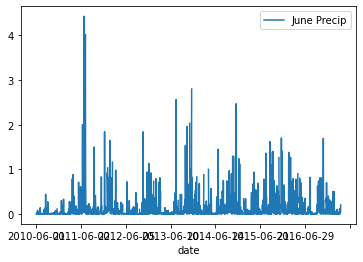

In [67]:
# confert the list to a dF
june_prec_df = pd.DataFrame(june_prec_results, columns=['date','June Precip'])
june_prec_df.set_index(june_prec_df['date'], inplace=True)
june_prec_df = june_prec_df.sort_index()
june_prec_df.plot()

In [68]:
# Get summary stats for precipitation in June
june_prec_df.describe()

,June Precip
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000


In [69]:
# Additional query 2: Get precipitation for December
dec_prec_results = session.query(Measurement.date,Measurement.prcp).filter(extract('month',Measurement.date)==12)
print(dec_prec_results.all())

[('2010-12-01', 0.04), ('2010-12-03', 0.0), ('2010-12-04', 0.0), ('2010-12-06', 0.0), ('2010-12-07', 0.0), ('2010-12-08', 0.0), ('2010-12-09', 0.0), ('2010-12-10', 1.58), ('2010-12-11', 0.77), ('2010-12-12', 0.0), ('2010-12-13', 0.0), ('2010-12-14', 0.0), ('2010-12-15', 0.0), ('2010-12-16', 0.0), ('2010-12-17', 0.0), ('2010-12-18', 0.0), ('2010-12-19', 1.4), ('2010-12-23', 0.0), ('2010-12-24', 0.0), ('2010-12-26', None), ('2010-12-27', 0.13), ('2010-12-28', 0.55), ('2010-12-29', 0.06), ('2010-12-30', 0.01), ('2010-12-31', 0.0), ('2011-12-01', 0.03), ('2011-12-02', 0.08), ('2011-12-03', 0.0), ('2011-12-04', 0.0), ('2011-12-05', 0.0), ('2011-12-06', 0.0), ('2011-12-07', 0.0), ('2011-12-08', 0.0), ('2011-12-09', 0.13), ('2011-12-10', 0.07), ('2011-12-11', 0.07), ('2011-12-12', 0.08), ('2011-12-13', 0.4), ('2011-12-14', 0.7), ('2011-12-15', 0.0), ('2011-12-16', 0.01), ('2011-12-17', 0.07), ('2011-12-18', 0.02), ('2011-12-19', 0.15), ('2011-12-20', 0.02), ('2011-12-21', 0.18), ('2011-12-22'

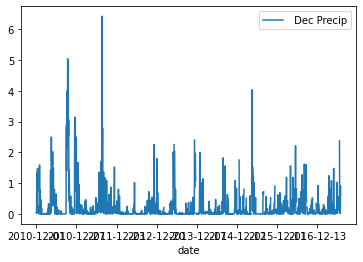

In [70]:
# confert the december precipitation list to a dF
dec_prec_df = pd.DataFrame(dec_prec_results, columns=['date',' Dec Precip'])
dec_prec_df.set_index(dec_prec_df['date'], inplace=True)
dec_prec_df = dec_prec_df.sort_index()
dec_prec_df.plot()

In [71]:
# Get summary stats for precipitation in June
dec_prec_df.describe()

,Dec Precip
count,1405.000000
mean,0.216819
std,0.541399
min,0.000000
25%,0.000000
50%,0.030000
75%,0.150000
max,6.420000
